# Transformación linear de una variable bivariada

Esta demo muestra la transformación de variable normal bivariada con correlación $X$ a una variable $Y$ sin correlación. 
Este ejemplo es útil para diagonalizar la forma cuadrática,
$ Q = (\boldsymbol{X}-\boldsymbol{\mu}_X)^T \, \boldsymbol{V}_X^{-1} \, (\boldsymbol{X}-\boldsymbol{\mu}_X)$, que aparece en la PDF conjunta de una variable normal bivariada.

## Variable normal bivariada $X$

$X$ = (altura, peso) de una persona

In [1]:
import numpy as np
# Height in centimeters
mean_height = 159  
# Weight in kilograms
mean_weight = 62.5
mean_x = np.array([mean_height, mean_weight])

Matrix de covarianza de $X$

In [2]:
sigma_height = 10
sigma_weight = 7
correlation = 0.7
covariance_matrix_x = np.empty(shape=(2,2))
covariance_matrix_x[0, 0] = sigma_height**2
covariance_matrix_x[0, 1] = correlation*sigma_height*sigma_weight
covariance_matrix_x[1,0] = covariance_matrix_x[0, 1] 
covariance_matrix_x[1, 1] = sigma_weight**2
covariance_matrix_x

array([[100.,  49.],
       [ 49.,  49.]])

Generamos muchos eventos de la variable $X$

In [3]:
from scipy.stats import multivariate_normal
population = 1000000
rng = np.random.default_rng(seed=6870)
data_x = multivariate_normal.rvs(mean_x, covariance_matrix_x, size=population, random_state=rng)
data_x

array([[165.00187387,  70.25277016],
       [167.27668328,  63.35112984],
       [149.13190509,  63.32035486],
       ...,
       [149.87691303,  59.01228931],
       [160.39119493,  60.76756803],
       [165.61329045,  66.16742394]])

Plot del histograma de densidad y de las elipses de covarianza de la PDF conjunta de $X$  

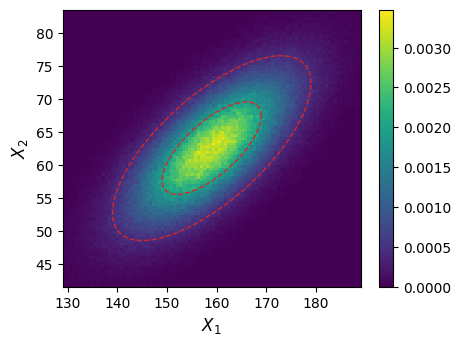

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots()
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")

height_limits = [mean_height-3*sigma_height, mean_height+3*sigma_height]
weight_limits = [mean_weight-3*sigma_weight, mean_weight+3*sigma_weight]
counts, xedges, yedges, im = ax.hist2d(data_x[:,0], data_x[:,1], range=[height_limits, weight_limits], bins=100, density=True, cmap=cm.viridis)
clb = plt.colorbar(im)

import danatools
ax.plot(*danatools.get_ellipse(mean_x, covariance_matrix_x, nsigma=1), color='tab:red', ls='--')
ax.plot(*danatools.get_ellipse(mean_x, covariance_matrix_x, nsigma=2), color='tab:red', ls='--')

## Variable bivariada $Y$

Obtenemos la variable $Y$ a partir de la diagonalización de la matriz hessiana de $X$

Matriz hessiana 

In [5]:
from numpy import linalg
hessian_matrix = linalg.inv(covariance_matrix_x)

Diagonalización de la matriz hessiana

In [6]:
eigenvalues, eigenvectors = linalg.eig(hessian_matrix)

In [7]:
eigenvalues

array([0.00770783, 0.05191601])

In [8]:
eigenvectors

array([[-0.85487944,  0.5188267 ],
       [-0.5188267 , -0.85487944]])

*Nota*: también se puede diagonalizar la matriz de covarianza en lugar de la hessiana ya que una matriz y su inversa tienen los mismos autovectores.

Matriz de rotación

In [9]:
# Transpossing to put the eigenvectors in the columns of the rotation matrix as required for matrix multiplication 
rotation_matrix = eigenvectors.T
rotation_matrix

array([[-0.85487944, -0.5188267 ],
       [ 0.5188267 , -0.85487944]])

Multiplicamos los eventos de $X$ por la matriz de rotación para obtener los eventos de $Y$

In [10]:
# Using an Einstein sum to transform all X events in a single line of code
data_y = np.einsum("nk,pk->pn", rotation_matrix, data_x)
data_y

array([[-177.50572237,   25.54972837],
       [-175.86965492,   32.63003065],
       [-160.3420902 ,   23.24234421],
       ...,
       [-158.74384275,   27.31175089],
       [-168.64297165,   31.26628934],
       [-175.90882315,   29.35942611]])

Media de $Y$

In [11]:
mean_y = rotation_matrix @ mean_x
mean_y

array([-168.35249966,   29.0634798 ])

In [12]:
mean_y1 = mean_y[0]
mean_y2 = mean_y[1]

Covarianza de $Y$

In [13]:
covariance_matrix_y = rotation_matrix @ covariance_matrix_x @ rotation_matrix.T
covariance_matrix_y

array([[1.29738121e+02, 0.00000000e+00],
       [1.77635684e-15, 1.92618791e+01]])

La matriz de covarianza de $Y$ es diagonal *dentro de la precisión númerica*

In [14]:
import math
sigma_y1 = math.sqrt(covariance_matrix_y[0,0])
sigma_y1

11.390264303118858

In [15]:
sigma_y2 = math.sqrt(covariance_matrix_y[1,1])
sigma_y2

4.388835734576571

Plot del histograma de densidad y de las elipses de covarianza de la PDF conjunta de $Y$  

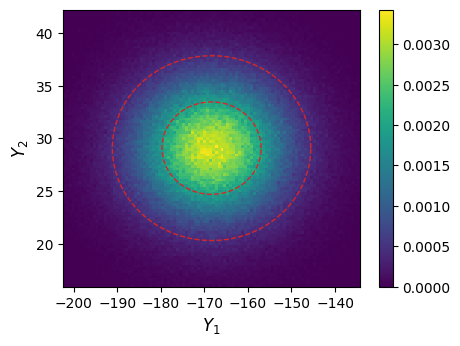

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel("$Y_1$")
ax.set_ylabel("$Y_2$")

y1_limits = [mean_y1-3*sigma_y1, mean_y1+3*sigma_y1]
y2_limits = [mean_y2-3*sigma_y2, mean_y2+3*sigma_y2]
counts, xedges, yedges, im = ax.hist2d(data_y[:,0], data_y[:,1], range=[y1_limits, y2_limits], bins=100, density=True, cmap=cm.viridis)
clb = plt.colorbar(im)

import danatools
ax.plot(*danatools.get_ellipse(mean_y, covariance_matrix_y, nsigma=1), color='tab:red', ls='--')
ax.plot(*danatools.get_ellipse(mean_y, covariance_matrix_y, nsigma=2), color='tab:red', ls='--')

La base de autovectores se obtiene mediante una rotación de la base canónica
En la base de autovectores de la matriz Hessiana, la matriz de covarianza de $Y$ es diagonal.
Por lo tanto la correlación entre las dos componentes de $Y$ es nula.
Como $Y$ sigue una distribución normal bivariada, correlación nula implica independencia de las componentes de $Y$. 

Esta demo muestra que una variable con correlación $X$ se puede reducir a una variable sin correlación $Y$ a través de una rotación de la  base de vectores 